Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel('iriss.xls')


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

2. Do necessary pre-processing steps.

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['SL']

0      5.1
1      4.9
2      NaN
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SL, Length: 150, dtype: float64

In [8]:
data['SL']=data['SL'].fillna(data['SL'].mean())

In [9]:
data['SL'].round(decimals=1)

0      5.1
1      4.9
2      5.9
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SL, Length: 150, dtype: float64

In [10]:
data['SW']=data['SW'].fillna(data['SW'].mean())
                                                
data['SW'].round(decimals=1)                   

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SW, Length: 150, dtype: float64

In [11]:
data['PL']=data['PL'].fillna(data['PL'].mean())
data['PL'].round(decimals=1)

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    3.8
148    5.4
149    5.1
Name: PL, Length: 150, dtype: float64

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
data.head(50)

,SL,SW,PL,PW,Classification
0,5.100000,3.500000,1.40000,0.2,Iris-setosa
1,4.900000,3.000000,1.40000,0.2,Iris-setosa
2,5.855944,3.200000,1.30000,0.2,Iris-setosa
3,4.600000,3.100000,1.50000,0.2,Iris-setosa
4,5.000000,3.600000,1.40000,0.2,Iris-setosa
5,5.400000,3.900000,1.70000,0.4,Iris-setosa
6,4.600000,3.400000,1.40000,0.3,Iris-setosa
7,5.000000,3.400000,1.50000,0.2,Iris-setosa
8,4.400000,2.900000,1.40000,0.2,Iris-setosa
9,4.900000,3.100000,1.50000,0.1,Iris-setosa


3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [14]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
l=LabelEncoder()

In [17]:
data['Classification']=l.fit_transform(data['Classification'])

In [18]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [20]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [19]:
x=data.drop(['Classification'],axis=1)

In [20]:
y=pd.DataFrame(data['Classification'])

In [21]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [22]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
#building the model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for Random Forest algorithm

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)

In [ ]:
#standard scaling

In [25]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

Splitting the dataset

In [26]:
x_train.shape

(105, 4)

In [27]:
y_train.shape

(105, 1)

In [28]:
x_test.shape

(45, 4)

In [29]:
y_test.shape

(45, 1)

SVM

In [30]:
model = svm.SVC() 
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9777777777777777


LOGISTIC REGRESSION

In [31]:
model = LogisticRegression(solver='lbfgs', max_iter=400) 
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9777777777777777


DECISION TREE

In [32]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9555555555555556


KNN

In [33]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of KNN is 1.0


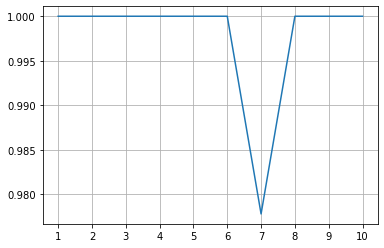

In [34]:
a_index=list(range(1,11))
a=pd.Series(dtype='float64')
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train.values.ravel())
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.grid()

In [35]:
model=KNeighborsClassifier(n_neighbors=1) 
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of KNN is 1.0


In [36]:
model=KNeighborsClassifier(n_neighbors=2) 
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)
print('The accuracy of KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of KNN is 1.0


RANDOM FOREST

In [37]:
r=RandomForestClassifier()
r.fit(x_train,y_train.values.ravel())
y_pred=r.predict(x_test)
print('The accuracy of Random Forest is',metrics.accuracy_score(prediction,y_test))

The accuracy of Random Forest is 1.0
